<a href="https://colab.research.google.com/github/prostwp/VKR/blob/main/DIPLOMMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive


import tensorflow as tf
import cv2



In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


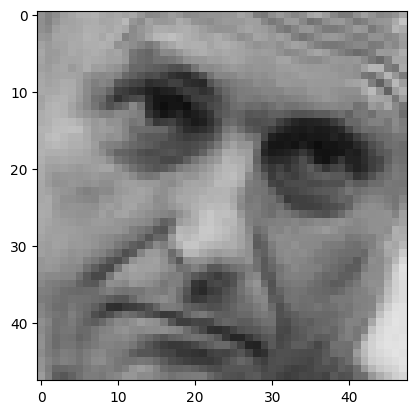

In [ ]:
Directory = '/content/gdrive/MyDrive/arch/'
Classes = ['0', '1', '2', '3', '4', '5', '6']
for category in Classes:
    path = os.path.join(Directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show
        break
    break


<function matplotlib.pyplot.show(close=None, block=None)>

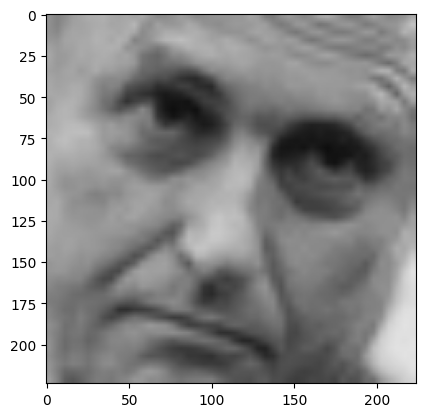

In [ ]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
trainining_Data = []
def trainig_category():
  for category in Classes:
    path = os.path.join(Directory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        trainining_Data.append([new_array,class_num])
      except Exception as e:
        pass


In [ ]:
trainig_category()

In [ ]:
print(len(trainining_Data))

7178


In [ ]:
temp = np.array(trainining_Data,dtype=object)


In [ ]:
temp.shape

(7178, 2)

In [ ]:
import random

random.shuffle(trainining_Data)

In [ ]:
X = []
Y = []

for feature,label in trainining_Data:
  X.append(feature)
  Y.append(label)

X = np.array(X)  
X = X.reshape(-1, img_size, img_size, 3)

In [ ]:
X = X/255.0;

In [ ]:
X.shape

(7178, 224, 224, 3)

In [ ]:
Y = np.array(Y)

In [ ]:
Y.shape

(7178,)

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = tf.keras.applications.MobileNetV2()

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
final_output = tf.keras.layers.Dense(128)(base_output)
final_ouput = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(64)(final_ouput)
final_ouput = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(7,activation='softmax')(final_ouput)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.fit_generator(X,Y)

<ipython-input-26-8bc2c22bf0c7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_model.fit_generator(X,Y)


In [ ]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [ ]:
faces = faceCascade.defaultMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0),2)
  facess = faceCascade.defaultMultiScale(roi_gray)
  if len(facess) == 0:
    print("face not found")
  else:
    for (ex,ey,ew,eh) in fscess:
      face_roi = roi_color[ey: ey+eh, ex: ex+ew]

In [ ]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.extand_dims(final_immage,axis=0)
final_image = final_image/255.0

In [ ]:
Predictions[0]

In [ ]:
np.argmax(Predictions)